# Kou, Rui - Homework 2

**Due: Monday 18th February**

We numerically explore the relationship between error distributions, objective functions (least squares, least absolute deviation, and weighted least squares), and computational speed.

The following simulation creates a data set according to
$$y_i = \beta_1 + \beta_2 x_i + \beta_3 x_i^2 + \epsilon_i.$$

We generate $n$ observations from this model for $x$ on an equally spaced grid $[0,1]$. For $Y^{(t)}$, the errors ($\epsilon_i$) have a t-distribution with 2 degrees of freedom. For $Y^{(n)}$, the errors have a standard normal distribution. For $Y^{(w)}$, the errors are heteroscedastic: $\epsilon_i|\sigma_i^2 \sim N(0,\sigma_i^2)$,  where $\sigma_i \sim 0.1 + \text{Exp}(1)$ (that is, an exponential distribution shifted $0.1$ to the right). We plot each of these data sets and the true regression function.

In [1]:
set.seed(1234)
n <- 500
x <- seq(from=0,to=1,length.out=n)
X <- cbind(1,x,x^2)
beta <- matrix(c(1,2,4),nrow=3)
Yt <- X%*%beta + rt(n,df=2)
Yn <- X%*%beta + rnorm(n)
sig <- 0.1 + rexp(n) 
Yw <- X%*%beta + rnorm(n,sd=sig)

SyntaxError: invalid syntax (<ipython-input-1-5f49df0f8301>, line 3)

In [ ]:
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))
ylim <- c(-5,10)
plot(X[,2],Yt,xlab="x",ylab="y",main="t errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yn,xlab="x",ylab="y",main="normal errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yw,xlab="x",ylab="y",main="heteroscedastic errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot) and there are also a lot of outliers in the case of the heteroscedastic errors. Given the data, out goal is to infer the parameters $\beta$. We will mainly consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} (y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta} |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed. In the case of the heteroscedastic errors dataset we will also compare to the weighted least squares estimator $\beta_{WLS}= (X^TWX)^{-1}X^TWY$, where $W$ is a diagonal matrix, with the diagonal given by $1/\sigma_i^2$ for $i=1,\dots,n$ (assume that the $\sigma_i$ are known). 

## Question 1

Fixing $X$, generate the $Y^{(t)}$, $Y^{(n)}$, and $Y^{(w)}$ datasets $N=100$ times (note that $n$ is the sample size and $N$ is the number of times we run the simulation). For the  $Y^{(t)}$ and $Y^{(n)}$ datasets, compute $\beta_{LS}$ and $\beta_{LAD}$ each time. Since $\beta$ is a vector of length $3$, this will result in 4 matrices (LS for $Y^{(t)}$ and $Y^{(n)}$ and LAD for $Y^{(t)}$ and $Y^{(n)}$) with $N$ rows and 3 columns (you could store this output in other formats as well, but matrices are convenient). For the $Y^{(w)}$ datasets, compute all three estimators $\beta_{LS}$, $\beta_{LAD}$, and $\beta_{WLS}$, and similarly store them in matrices. 

Make scatterplots of $\beta_2$ versus $\beta_3$ estimates for each data type and each estimator. This will produce seven scatterplots in total. Mark the true $\beta_2$ and $\beta_3$ on each plot and comment of the quality of the estimators in the different settings. Your scatterplots should look similar to the ones below.

**Tips for Fitting** 

- For fitting $\beta_{LS}$, you have many options in R (lm, lm.fit) and python (scipy.linalg.lstsq, sklearn.linear_model.LinearRegression). 
- For fitting $\beta_{LAD}$ in R you can use l1fit from the package L1pack or  rq.fit from quantreg. For fitting $\beta_{LAD}$ in python the options are somewhat more limited:
    * [statsmodels](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html) requires use of pandas, calls the quantreg R package
    * generic optimizer such as [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)   
  The later is a more general method that will likely be slower. But scipy.optimize is general and will be useful for many other problems. You may also use any other optimizer you find. 
- For fitting $\beta_{WLS}$ in R you can use for example lm.wfit or lsfit (the latter may be more convenient here). In Python you can use for example the sample_weight option in sklearn.linear_model.LinearRegression or statsmodels.regression.linear_model.WLS. 

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaT.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaNorm.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaHet.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
%matplotlib inline

In [2]:
n=500
x = np.linspace(0,1,n) # even spaced x
X = np.matrix((np.ones((n)),x,x**2)).T
beta = np.matrix(np.array([1,2,4])).reshape(3,1)

#### T distribution Error and Yt

In [9]:
et = np.matrix(np.random.standard_t(2,n)).reshape(n,1)
Yt = np.matmul(X,beta)+et

In [10]:
# Least Square Estimator
LS_Yt = LinearRegression(fit_intercept=False).fit(X,Yt) # Because we already include a column of 1 in X matrix
Yt_pred = LS_Yt.predict(X)
LS_Yt.coef_

array([[0.98023653, 2.25976311, 3.69411283]])

(-5, 10)

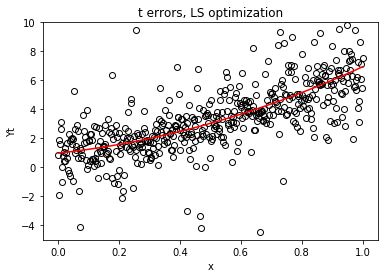

In [11]:
plt.plot(x,Yt, 'o',mfc = 'none',color = 'black')
plt.plot(x,Yt_pred,color = 'r')
plt.xlabel('x')
plt.ylabel('Yt')
plt.title('t errors, LS optimization')
plt.ylim ((-5,10))

In [12]:
# Define L1 norm residual function
def ft(beta):
    beta = np.matrix(beta).reshape(3,1)
    return np.sum(np.absolute(Yt-np.matmul(X,beta)))

In [13]:
#L1 norm estimator
res = minimize(ft, [1,1,1])
res.x

array([0.99907948, 2.0860487 , 3.72683254])

#### Normal distribution erro and Yn 

In [14]:
en = np.matrix(np.random.normal(size = n)).reshape(n,1)
Yn = np.matmul(X,beta)+en

In [15]:
# Least Square Estimator
LS_Yn = LinearRegression(fit_intercept=False).fit(X,Yn) # Because we already include a column of 1 in X matrix
Yn_pred = LS_Yn.predict(X)
LS_Yn.coef_

array([[0.89612709, 2.11747449, 4.18994371]])

(-5, 10)

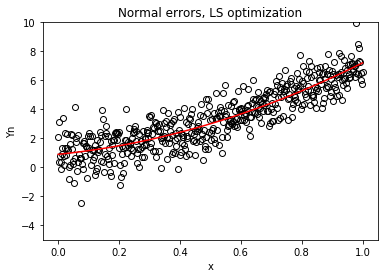

In [20]:
plt.plot(x,Yn, 'o',mfc = 'none',color = 'black')
plt.plot(x,Yn_pred,color = 'r')
plt.xlabel('x')
plt.ylabel('Yn')
plt.title('Normal errors, LS optimization')
plt.ylim ((-5,10))

In [17]:
def fn(beta):
    beta = np.matrix(beta).reshape(3,1)
    return np.sum(np.absolute(Yn-np.matmul(X,beta)))
#L1 norm estimator
res = minimize(fn, [1,1,1])
res.x

array([0.88124585, 2.14643022, 4.21991414])

#### Heteroscedastic distribution and Yw

In [18]:
sig = 0.1+ np.random.exponential(size = n)
ew = np.matrix(np.random.normal(0,sig,size = n)).reshape(n,1)
Yw = np.matmul(X,beta)+ew

In [19]:
# Least Square Estimator
LS_Yw = LinearRegression(fit_intercept=False).fit(X,Yw) # Because we already include a column of 1 in X matrix
Yw_pred = LS_Yw.predict(X)
LS_Yw.coef_

array([[1.16814094, 2.04070187, 3.59909474]])

(-5, 10)

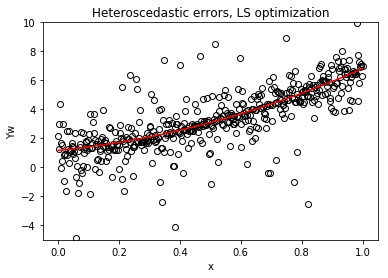

In [21]:
plt.plot(x,Yw, 'o',mfc = 'none',color = 'black')
plt.plot(x,Yw_pred,color = 'r')
plt.xlabel('x')
plt.ylabel('Yw')
plt.title('Heteroscedastic errors, LS optimization')
plt.ylim ((-5,10))

In [22]:
def fw(beta):
    beta = np.matrix(beta).reshape(3,1)
    return np.sum(np.absolute(Yw-np.matmul(X,beta)))
#L1 norm estimator
res = minimize(fw, [1,1,1])
res.x

array([1.06630338, 2.07961714, 3.73667467])

In [101]:
weight = 1/sig**2
WLS_Yw = LinearRegression(fit_intercept=False).fit(X,Yw, sample_weight=weight)
WLS_Yw.coef_

array([[0.98604268, 2.06233556, 3.97316184]])

### Repeat the regression 100 times

In [63]:
N=100
LS_t = np.zeros((N,3))
LAD_t = np.zeros((N,3)

for i in range(N):
    et = np.matrix(np.random.standard_t(2,n)).reshape(n,1)
    Yt = np.matmul(X,beta)+et
    LS_Yt = LinearRegression(fit_intercept=False).fit(X,Yt)
    LS_t[i]=LS_Yt.coef_
    res = minimize(ft, [1,1,1])
    LAD_t[i]=res.x

In [125]:
N=100
LS_n = np.zeros((N,3))
LAD_n = np.zeros((N,3))
for i in range(N):
    en = np.matrix(np.random.normal(size = n)).reshape(n,1)
    Yn = np.matmul(X,beta)+en
    LS_Yn = LinearRegression(fit_intercept=False).fit(X,Yn) # Because we already include a column of 1 in X matrix
    LS_n[i] = LS_Yn.coef_
    res = minimize(fn, [1,1,1])
    LAD_n[i]=res.x

/Users/weibing/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


In [133]:
N=100
LS_w = np.zeros((N,3))
LAD_w = np.zeros((N,3))
WLS_w = np.zeros((N,3))
for i in range(N):
    sig = 0.1+ np.random.exponential(size = n)
    ew = np.matrix(np.random.normal(0,sig,size = n)).reshape(n,1)
    Yw = np.matmul(X,beta)+ew
    LS_Yw = LinearRegression(fit_intercept=False).fit(X,Yw) # Because we already include a column of 1 in X matrix
    LS_w[i] = LS_Yw.coef_
    res = minimize(fw, [1.0,1.0,1.0])
    LAD_w[i]=res.x
    weight = 1/sig**2
    WLS_Yw = LinearRegression(fit_intercept=False).fit(X,Yw, sample_weight=weight)
    WLS_w[i] = WLS_Yw.coef_

Text(0.5, 1.0, 'WLS-w erros')

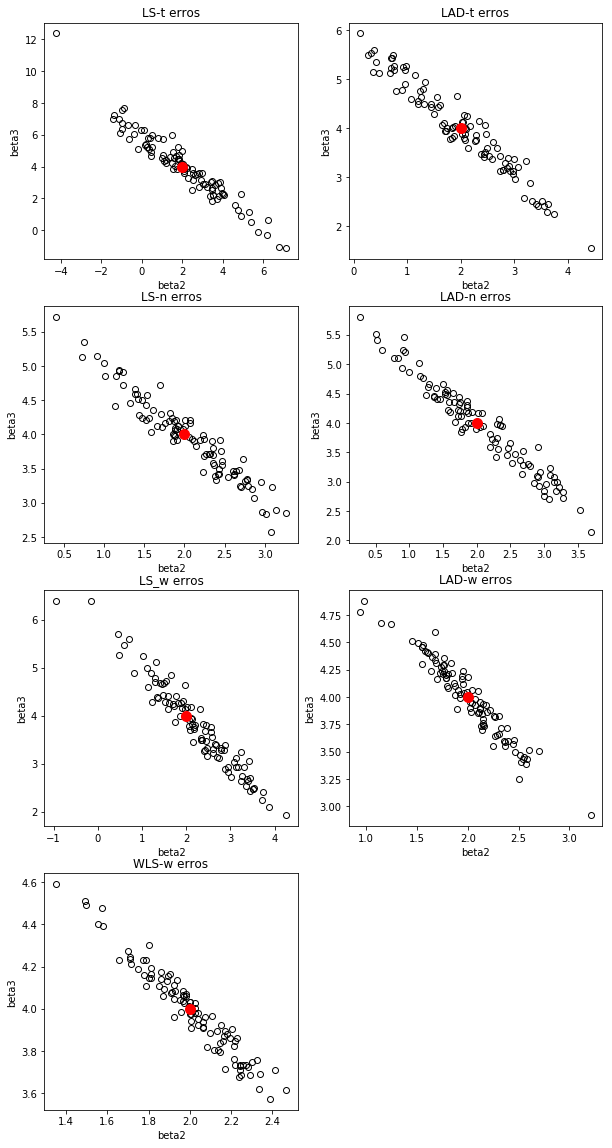

In [136]:
f=plt.figure(1)
f.set_figheight(20)
f.set_figwidth(10)

plt.subplot(421)
plt.plot(LS_t[:,1],LS_t[:,2], 'o',mfc = 'none',color = 'black')
plt.plot([2],[4],'o',color = 'r', markersize = 10)
plt.xlabel('beta2')
plt.ylabel('beta3')
plt.title('LS-t erros')

plt.subplot(422)
plt.plot(LAD_t[:,1],LAD_t[:,2], 'o',mfc = 'none',color = 'black')
plt.plot([2],[4],'o',color = 'r', markersize = 10)
plt.xlabel('beta2')
plt.ylabel('beta3')
plt.title('LAD-t erros')

plt.subplot(423)
plt.plot(LS_n[:,1],LS_n[:,2], 'o',mfc = 'none',color = 'black')
plt.plot([2],[4],'o',color = 'r', markersize = 10)
plt.xlabel('beta2')
plt.ylabel('beta3')
plt.title('LS-n erros')

plt.subplot(424)
plt.plot(LAD_n[:,1],LAD_n[:,2], 'o',mfc = 'none',color = 'black')
plt.plot([2],[4],'o',color = 'r', markersize = 10)
plt.xlabel('beta2')
plt.ylabel('beta3')
plt.title('LAD-n erros')

plt.subplot(425)
plt.plot(LS_w[:,1],LS_w[:,2], 'o',mfc = 'none',color = 'black')
plt.plot([2],[4],'o',color = 'r', markersize = 10)
plt.xlabel('beta2')
plt.ylabel('beta3')
plt.title('LS_w erros')

plt.subplot(426)
plt.plot(LAD_w[:,1],LAD_w[:,2], 'o',mfc = 'none',color = 'black')
plt.plot([2],[4],'o',color = 'r', markersize = 10)
plt.xlabel('beta2')
plt.ylabel('beta3')
plt.title('LAD-w erros')

plt.subplot(427)
plt.plot(WLS_w[:,1],WLS_w[:,2], 'o',mfc = 'none',color = 'black')
plt.plot([2],[4],'o',color = 'r', markersize = 10)
plt.xlabel('beta2')
plt.ylabel('beta3')
plt.title('WLS-w erros')


## Question 2

Compare the speed of $\beta_{LS}$ to $\beta_{LAD}$ using a package such as microbenchmark in R or some of the tools [here](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) in python. Empirically determine the computational complexity (in $n$) of $\beta_{LAD}$ and $\beta_{LS}$ (we know from theoretical analysis that $\widehat{\beta}_{LS}$ should be linear in $n$).

In [137]:
%timeit LinearRegression(fit_intercept=False).fit(X,Yt)

419 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [138]:
%timeit minimize(ft, [1,1,1])

50.9 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### As shown above, LAD method is much slower than LS method